In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from wordcloud import WordCloud
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

from nltk import tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,5

# Reading the CSV file :

In [3]:
df_reviews_ratings = pd.read_csv('Amazon_reviews.csv')
df_reviews_ratings.head(5)

,Reviews,Ratings
0,Horrible noise coming while washing or spinnin...,1
1,It's made my life easier.Writing this review a...,5
2,I would like to share my experience one by one...,5
3,The media could not be loaded.\n ...,5
4,The media could not be loaded.\n ...,2


In [4]:
df_reviews_ratings.shape

(990, 2)

In [5]:
df_reviews_ratings.Reviews=df_reviews_ratings.Reviews.astype(str)

In [6]:
df_reviews_ratings["Orig_Reviews"]=df_reviews_ratings.Reviews
df_reviews_ratings.Orig_Reviews = df_reviews_ratings.Reviews.apply(lambda x: x.strip() )

# Text Preprocessing

### Fundamental Preprocessing :

In [7]:
# Converting all the data into lower case : Normalizing the data
df_reviews_ratings.Reviews=df_reviews_ratings.Reviews.apply(lambda x: x.lower())

In [8]:
# Remove URL's from data 
df_reviews_ratings.Reviews=df_reviews_ratings.Reviews.apply(lambda x: re.sub(r'http\S+', '', x))

In [9]:
#  Removing Usernames from data
df_reviews_ratings.Reviews=df_reviews_ratings.Reviews.apply(lambda x: re.sub('@[^\s]+','',x))

In [10]:
# Removing other characters except for alphabets and space
df_reviews_ratings.Reviews = df_reviews_ratings.Reviews.apply(lambda x: re.sub('[^a-z ]','', x))

In [11]:
# Removing the spaces at the start and end of strings 
tot_rev = [Reviews.strip() for Reviews in df_reviews_ratings.Reviews]

# Analysing Text Statistics :

### No of characters :

In [12]:
# Finding no of characters in each review : 
df_reviews_ratings["no_of_characters"]=df_reviews_ratings.Reviews.str.len()

### Word Frequecy Analysis :

In [13]:
# Finding the no of words in each review 

df_reviews_ratings["no_of_words"]= df_reviews_ratings.Reviews.str.split().map(lambda x: len(x))

### Average length of Words :

In [14]:
# finding avg length of words in each review: 

avg_Word_length=[]
for i in df_reviews_ratings["Reviews"].str.split():
    word_len=[]
    for j in i:
        word_len.append(len(j))
    avg_Word_length.append(np.mean(word_len))
    
df_reviews_ratings["avd_Word_Length"]=avg_Word_length    

C:\Users\Mani\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Mani\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [15]:
df_reviews_ratings.head()

,Reviews,Ratings,Orig_Reviews,no_of_characters,no_of_words,avd_Word_Length
0,horrible noise coming while washing or spinnin...,1,Horrible noise coming while washing or spinnin...,712,116,5.129310
1,its made my life easierwriting this review aft...,5,It's made my life easier.Writing this review a...,1366,245,4.563265
2,i would like to share my experience one by one...,5,I would like to share my experience one by one...,2673,453,4.852097
3,the media could not be loaded w...,5,The media could not be loaded.\n ...,842,149,4.550336
4,the media could not be loaded d...,2,The media could not be loaded.\n ...,1369,227,4.933921


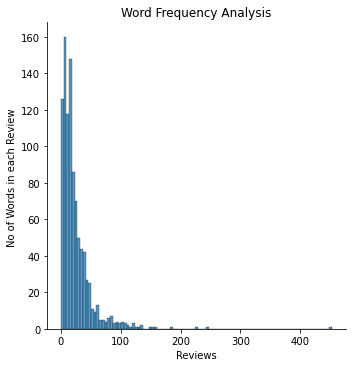

In [16]:
ax=sns.displot(x=df_reviews_ratings.no_of_words)
ax.set(xlabel='Reviews', ylabel='No of Words in each Review ', title='Word Frequency Analysis')

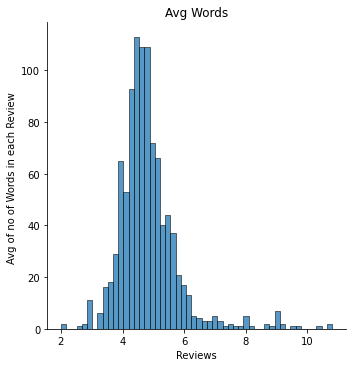

In [17]:
ax=sns.displot(df_reviews_ratings.avd_Word_Length)
ax.set(xlabel='Reviews', ylabel='Avg of no of Words in each Review ', title='Avg Words')

In [18]:
df_reviews_ratings

,Reviews,Ratings,Orig_Reviews,no_of_characters,no_of_words,avd_Word_Length
0,horrible noise coming while washing or spinnin...,1,Horrible noise coming while washing or spinnin...,712,116,5.129310
1,its made my life easierwriting this review aft...,5,It's made my life easier.Writing this review a...,1366,245,4.563265
2,i would like to share my experience one by one...,5,I would like to share my experience one by one...,2673,453,4.852097
3,the media could not be loaded w...,5,The media could not be loaded.\n ...,842,149,4.550336
4,the media could not be loaded d...,2,The media could not be loaded.\n ...,1369,227,4.933921
...,...,...,...,...,...,...
985,machine works perfectly and washes fine,5,Machine works perfectly and washes fine.,39,6,5.666667
986,good productclothes get fast dry,5,Good product..Clothes get fast dry,32,5,5.600000
987,good in washing esay to handle but little soun...,4,Good in washing esay to handle but little soun...,68,13,4.307692
988,so far so good,5,So far so good,14,4,2.750000


C:\Users\Mani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


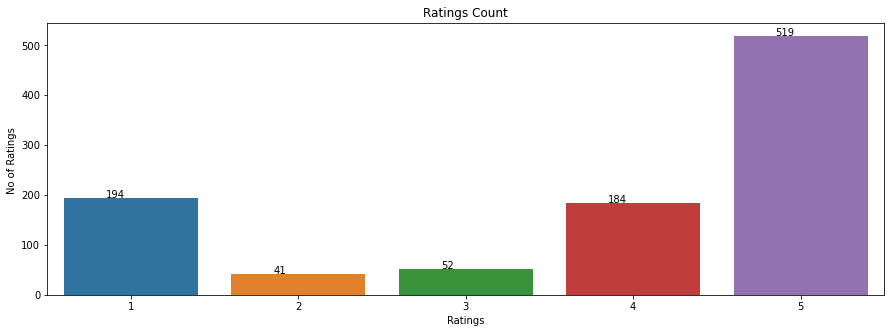

In [19]:

ax=sns.countplot(df_reviews_ratings.Ratings)
ax.set(xlabel='Ratings', ylabel='No of Ratings ', title='Ratings Count')
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.75))
plt.show()

###  Word Tokenization

In [20]:
df_reviews_ratings.Reviews = df_reviews_ratings.Reviews.apply(lambda x: tokenize.word_tokenize(x))

### Stopwords Removal

In [21]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
stop_words=stopwords.words('english') # importing stopwords

In [23]:
df_reviews_ratings.Reviews = df_reviews_ratings.Reviews.apply(lambda x: [word  for word in x if word not in stop_words] )

### Lemmatization : 

In [24]:
df_reviews_ratings.Reviews = df_reviews_ratings.Reviews.apply(lambda x: " ".join(x) )

In [25]:
nlp = spacy.load("en_core_web_sm")
df_reviews_ratings.Reviews = df_reviews_ratings.Reviews.apply(lambda x: [token.lemma_ for token in nlp(x)] )

In [26]:
df_reviews_ratings.Reviews

0      [horrible, noise, come, washing, spinning, ret...
1      [make, life, easierwrite, review, month, use, ...
2      [would, like, share, experience, one, onedeliv...
3      [medium, could, load, washing, machine, got, d...
4      [medium, could, load, defective, product, reci...
                             ...                        
985               [machine, work, perfectly, wash, fine]
986                [good, productclothe, get, fast, dry]
987    [good, washing, esay, handle, little, sound, h...
988                                          [far, good]
989    [good, product, service, samsung, brandmust, buy]
Name: Reviews, Length: 990, dtype: object

# Word Clouds :

### Word Cloud is what many people think of when speaking of NLP. It counts the frequency of words and resizes each word based on their frequencies. The more frequent a word is, the more outstanding it is in the word cloud. The idea is simple but efficient.

### Most Repeated words  : Finding the most repeated word in the reviews.

In [27]:
# Creating a single list of all the lemmatized sentences which were lists
tot_reviwes= []
for i in range(0,len(df_reviews_ratings.Reviews)):
    tot_reviwes += df_reviews_ratings.Reviews[i]

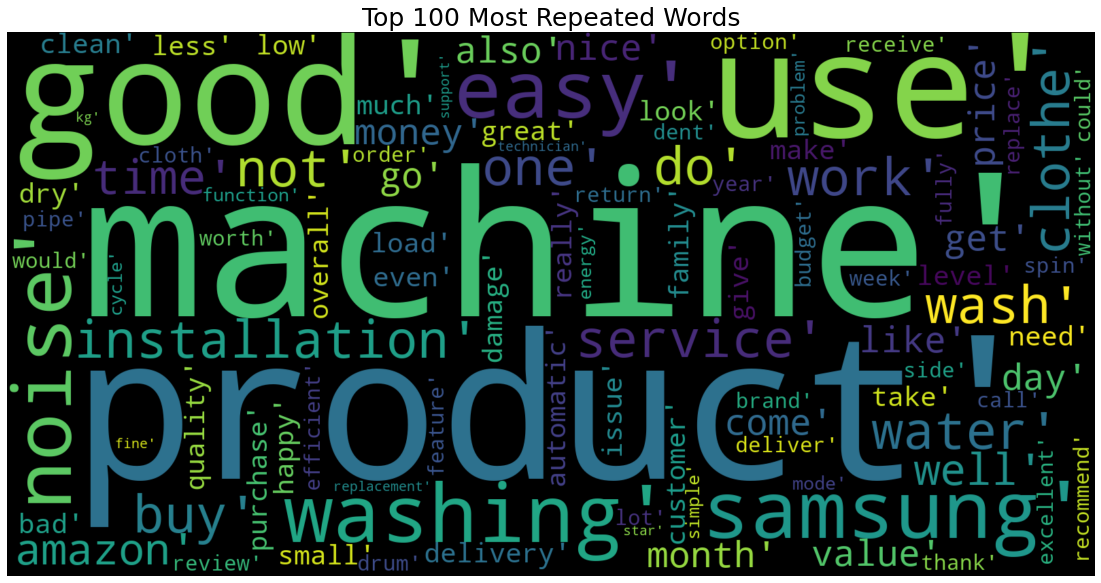

In [28]:
mostcommon = FreqDist(tot_reviwes).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='black').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Top 100 Most Repeated Words', fontsize=25)
plt.show()

In [29]:
words = []
count = []
for i in mostcommon:
    words.append(i[0])
    count.append(i[1])

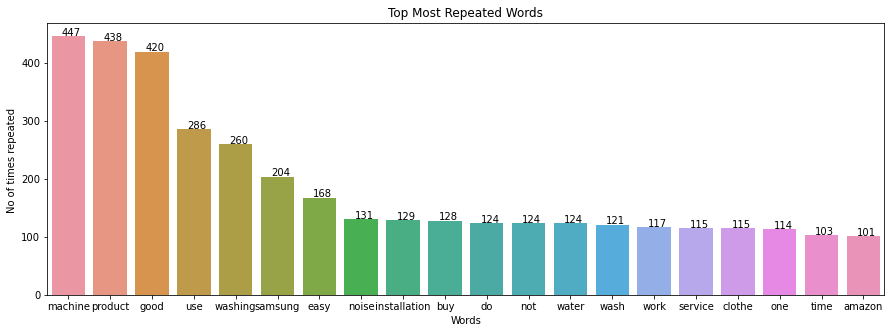

In [30]:
ax=sns.barplot(x=words[0:20],y=count[0:20])
ax.set(xlabel='Words', ylabel='No of times repeated ', title='Top Most Repeated Words')
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.75))
plt.show()

### Most repeated words based on ratings : 

In [31]:
# Converting all the lists into strings 
df_reviews_ratings.Reviews = df_reviews_ratings.Reviews.apply(lambda x: " ".join(x) )

Most common  [('product', 115), ('machine', 108), ('samsung', 65), ('washing', 54), ('good', 51), ('use', 49), ('buy', 49), ('installation', 47), ('service', 42), ('water', 38), ('wash', 35), ('one', 33), ('day', 30), ('amazon', 29), ('time', 29)]


C:\Users\Mani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


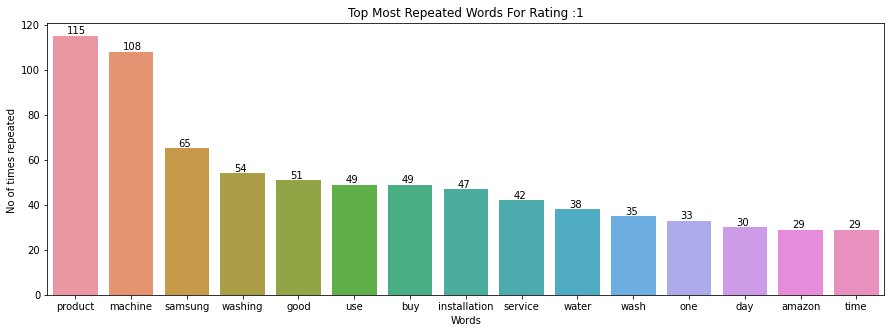

Most common  [('product', 30), ('good', 18), ('samsung', 17), ('machine', 13), ('get', 12), ('service', 10), ('amazon', 9), ('washing', 8), ('receive', 8), ('return', 7), ('time', 7), ('damage', 7), ('rs', 6), ('cashback', 6), ('side', 6)]


C:\Users\Mani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


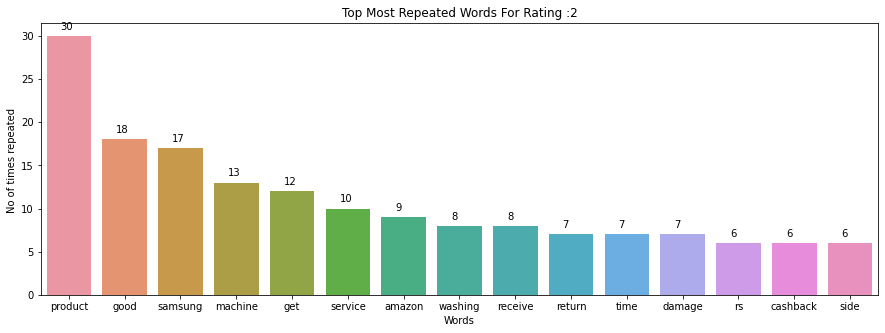

Most common  [('machine', 27), ('product', 25), ('good', 18), ('water', 16), ('use', 14), ('installation', 9), ('wash', 9), ('samsung', 8), ('easy', 8), ('come', 8), ('clean', 8), ('take', 7), ('time', 7), ('washing', 7), ('work', 7)]


C:\Users\Mani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


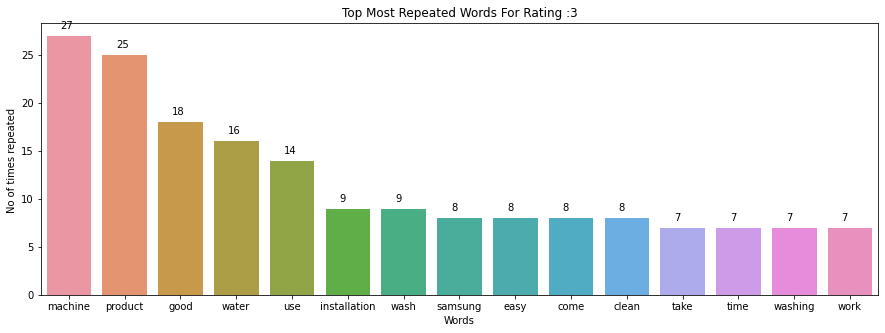

Most common  [('good', 91), ('machine', 67), ('product', 59), ('washing', 40), ('use', 35), ('samsung', 29), ('noise', 26), ('easy', 24), ('work', 17), ('one', 17), ('money', 17), ('water', 17), ('service', 17), ('value', 16), ('much', 16)]


C:\Users\Mani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


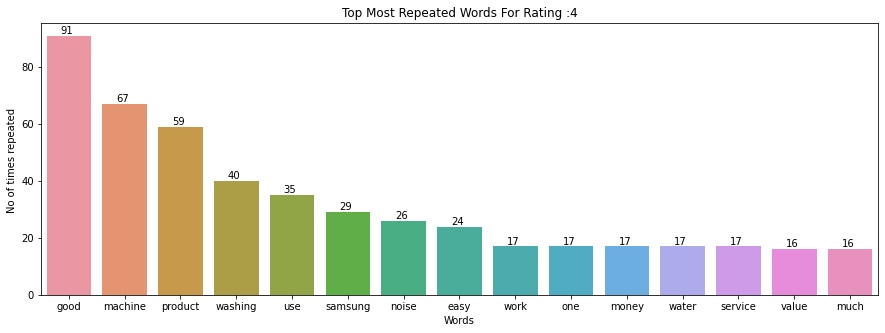

C:\Users\Mani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Most common  [('good', 242), ('machine', 232), ('product', 209), ('use', 183), ('washing', 151), ('easy', 117), ('samsung', 85), ('noise', 69), ('clothe', 63), ('work', 63), ('well', 59), ('wash', 56), ('one', 56), ('buy', 56), ('money', 54)]


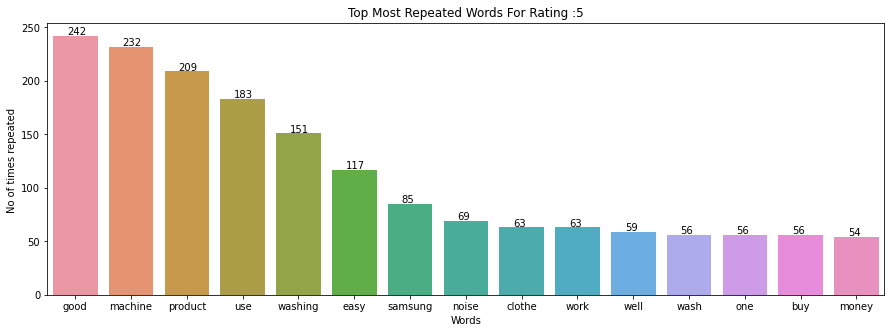

In [32]:
grp=df_reviews_ratings.groupby('Ratings')['Reviews']
rev_ratings=[]
for j in range(1,6):
    rev_ratings= ' '.join(grp.get_group(j))
    tok_rev_ratings=tokenize.word_tokenize(rev_ratings)
    rem_stopWords_rev_ratings=[word  for word in tok_rev_ratings if word not in stop_words]
    mostcommon_ratings = FreqDist(rem_stopWords_rev_ratings).most_common(15)
    words = []
    count = []
    print("Most common ",mostcommon_ratings)
    for i in mostcommon_ratings:
        #print(i)
        words.append(i[0])
        count.append(i[1])
    ax=sns.barplot(words,count)
    ax.set(xlabel='Words', ylabel='No of times repeated ', title='Top Most Repeated Words For Rating :'+str(j))
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.75))
    plt.show()
   

### Positive Words :

In [33]:
# Reading txt file
with open("C:\\Users\\Mani\\EXCELR\\NLP_AmazonReview\\NLP_scr\\positive-words.txt","r") as pos:
      positive_words = pos.read().split("\n")

positive_words = positive_words[36:]

positive_words[:10]

['abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade']

In [34]:
reviews_positiveWords = [word  for word in tot_reviwes if word  in positive_words] 

In [35]:
len(reviews_positiveWords)

1924

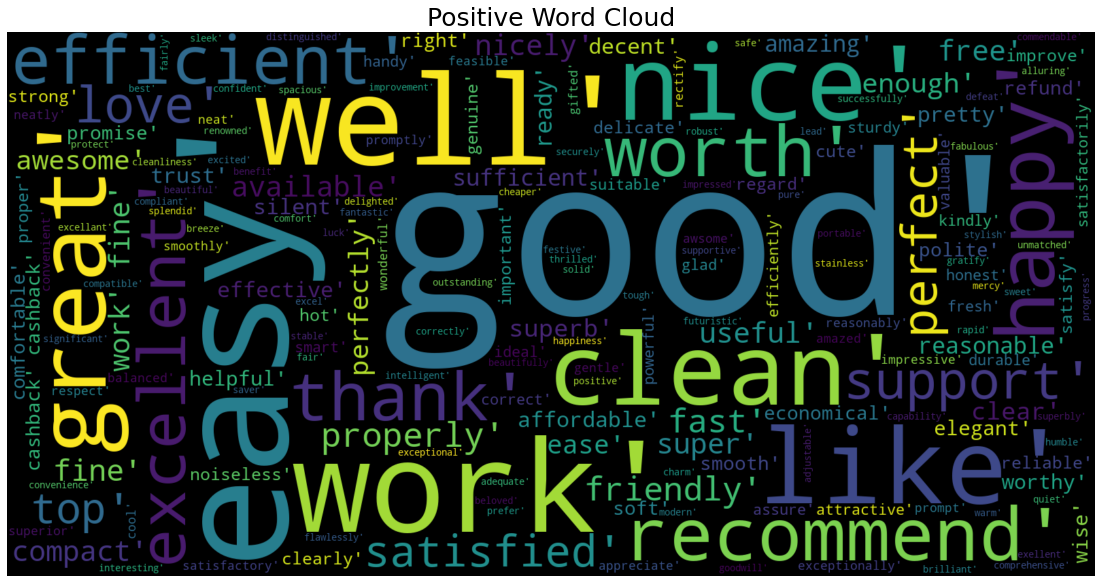

In [36]:
wordcloud = WordCloud(width=1600, height=800, background_color='black').generate(str(reviews_positiveWords))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Positive Word Cloud', fontsize=25)
plt.show()

### Negative Words :

In [37]:
# Reading txt file
with open("C:\\Users\\Mani\\EXCELR\\NLP_AmazonReview\\NLP_scr\\negative-words.txt","r") as pos:
      negative_words = pos.read().split("\n")

negative_words = negative_words[35:]

negative_words[:10]

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted']

In [38]:
reviews_negativeWords = [word  for word in tot_reviwes if word  in negative_words] 

In [39]:
len(reviews_negativeWords)

787

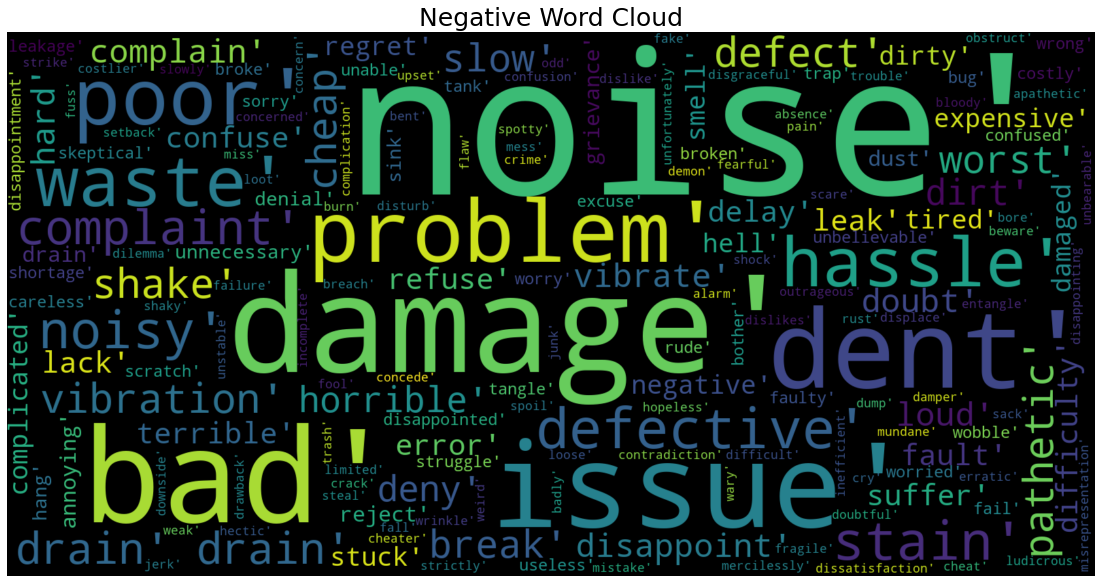

In [40]:
wordcloud = WordCloud(width=1600, height=800, background_color='black').generate(str(reviews_negativeWords))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Negative Word Cloud', fontsize=25)
plt.show()

# Named Entity Recognition :

In [41]:
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
rev_comp=" ".join(tot_reviwes)
doc=nlp(rev_comp)
spacy.displacy.render(doc, style='ent')

In [42]:
[(x.text,x.label_) for x in doc.ents]

[('next day', 'DATE'),
 ('month', 'DATE'),
 ('putno problemi', 'PERSON'),
 ('daily', 'DATE'),
 ('one', 'CARDINAL'),
 ('first', 'ORDINAL'),
 ('one', 'CARDINAL'),
 ('samsung amazon', 'GPE'),
 ('call samsung deny', 'ORG'),
 ('proofand', 'GPE'),
 ('season', 'DATE'),
 ('samsung kg', 'GPE'),
 ('last year', 'DATE'),
 ('almost half', 'CARDINAL'),
 ('one', 'CARDINAL'),
 ('past day', 'DATE'),
 ('garmentstypically g jeansg', 'PERSON'),
 ('one', 'CARDINAL'),
 ('foamthermocol', 'CARDINAL'),
 ('samsung make', 'GPE'),
 ('first', 'ORDINAL'),
 ('second', 'ORDINAL'),
 ('day', 'DATE'),
 ('first', 'ORDINAL'),
 ('next morning', 'TIME'),
 ('second', 'ORDINAL'),
 ('one', 'CARDINAL'),
 ('samsung', 'ORG'),
 ('samsung', 'ORG'),
 ('one', 'CARDINAL'),
 ('first', 'ORDINAL'),
 ('second', 'ORDINAL'),
 ('dealer samsung', 'PERSON'),
 ('samsung team', 'ORG'),
 ('one half month', 'DATE'),
 ('samsung', 'ORG'),
 ('week', 'DATE'),
 ('kgsquick', 'PERSON'),
 ('month', 'DATE'),
 ('happen week', 'DATE'),
 ('aqua mode', 'PRODUC

In [43]:
tot_text = [x.label_ for x in doc.ents]

In [44]:
from collections import Counter 

In [45]:
def count_texts(text) : 
    counter=Counter(text)
    #print("****************  counter: ",counter)
    count=counter.most_common()
    #print("******************* count : ", count)
    rev_ner,counts=map(list,zip(*count))
    return rev_ner,counts

<AxesSubplot:>

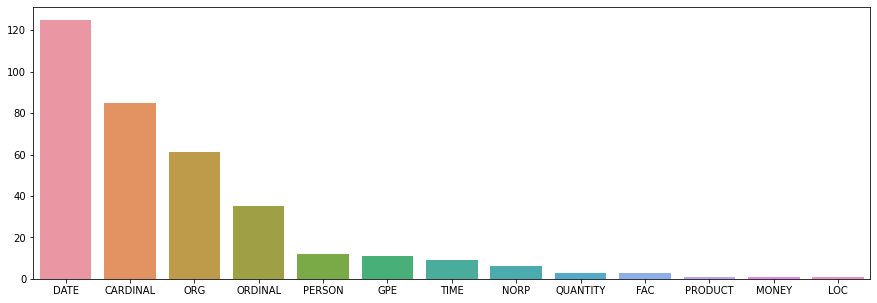

In [46]:
rev_ner,counts=count_texts(tot_text)
sns.barplot(x=rev_ner,y=counts)


In [47]:
org_mentioned=[X.text for X in doc.ents if X.label_ == "ORG"]

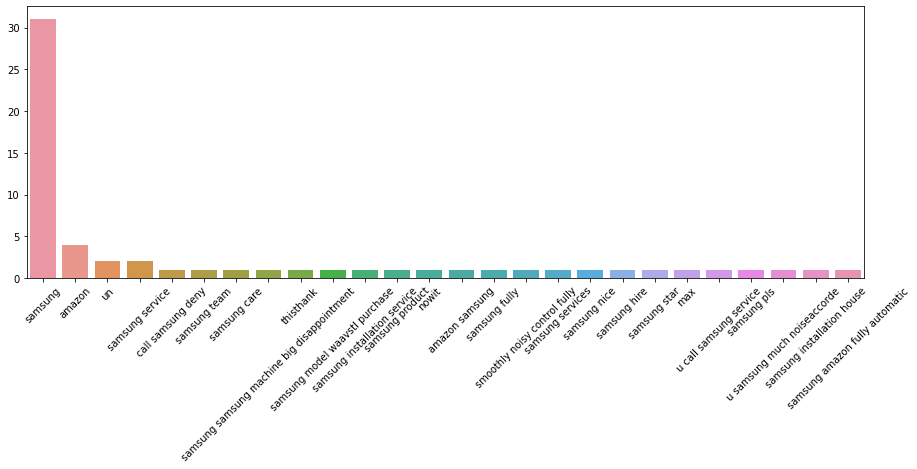

In [48]:
org_name,org_count=count_texts(org_mentioned)
plots=sns.barplot(x=org_name,y=org_count )
plots.set_xticklabels(plots.get_xticklabels(), rotation=45)
plt.show()

# Parts of Speech Tagging :

In [49]:
for token in doc[:]:
    print(token,"--", token.pos_)

horrible -- ADJ
noise -- NOUN
come -- VERB
washing -- NOUN
spinning -- NOUN
return -- NOUN
backhowever -- PROPN
samsung -- PROPN
customer -- NOUN
care -- NOUN
convince -- NOUN
complaint -- NOUN
horrible -- ADJ
noise -- NOUN
reject -- VERB
request -- NOUN
return -- NOUN
product -- NOUN
thereafter -- ADV
raise -- VERB
issue -- NOUN
amazon -- NOUN
understand -- VERB
grievance -- NOUN
send -- VERB
technician -- ADJ
technician -- PROPN
check -- NOUN
machine -- NOUN
thoroughly -- ADV
come -- VERB
conclusion -- NOUN
manufacturing -- NOUN
defect -- NOUN
due -- ADJ
annoying -- ADJ
noise -- NOUN
come -- VERB
next -- ADJ
day -- NOUN
amazon -- NOUN
arrange -- VERB
pickup -- NOUN
product -- NOUN
hour -- NOUN
pickup -- NOUN
money -- NOUN
transfer -- NOUN
bank -- NOUN
account -- NOUN
much -- ADV
impressed -- ADJ
world -- NOUN
class -- NOUN
customer -- NOUN
grievance -- NOUN
redressal -- NOUN
systemthank -- NOUN
alot -- NOUN
amazon -- NOUN
team -- NOUN
happy -- ADJ
great -- ADJ
service -- NOUN
make --

amazon -- PROPN
samsung -- PROPN
customer -- PROPN
supportthis -- PROPN
great -- ADJ
machine -- NOUN
blindly -- ADV
go -- VERB
get -- VERB
month -- NOUN
may -- AUX
initially -- ADV
skeptical -- ADJ
really -- ADV
nice -- ADJ
monsoon -- NOUN
option -- NOUN
afeature -- NOUN
really -- ADV
help -- VERB
clothe -- VERB
get -- VERB
almost -- ADV
dry -- ADJ
helpful -- ADJ
facility -- NOUN
extendedable -- ADJ
pipe -- NOUN
atleast -- NOUN
cm -- VERB
great -- ADJ
could -- AUX
deattach -- VERB
reattach -- PROPN
whenevr -- ADJ
necessary -- ADJ
service -- NOUN
installation -- NOUN
well -- ADP
good -- ADJ
offer -- NOUN
we -- PRON
cover -- VERB
really -- ADV
good -- ADJ
stand -- VERB
little -- ADV
costly -- ADJ
stand -- VERB
worth -- ADJ
movable -- ADJ
adjustable -- ADJ
give -- NOUN
machine -- NOUN
clean -- ADJ
well -- ADV
clean -- ADJ
entire -- ADJ
machine -- NOUN
keep -- VERB
good -- ADJ
condition -- NOUN
u -- NOUN
compare -- VERB
front -- NOUN
load -- NOUN
do -- AUX
not -- PART
give -- VERB
much -- 

wash -- PROPN
clothe -- DET
clean -- PROPN
detergent -- NOUN
remain -- VERB
clothsso -- PROPN
complete -- ADJ
wash -- NOUN
powderdetergent -- NOUN
remain -- VERB
clothesalso -- ADJ
dryer -- NOUN
work -- NOUN
perfectlyi -- NOUN
totally -- ADV
un -- PROPN
happy -- ADJ
programming -- NOUN
cycle -- NOUN
mean -- NOUN
buy -- VERB
fully -- ADV
automatic -- ADJ
machine -- NOUN
washing -- NOUN
machine -- NOUN
good -- ADJ
job -- NOUN
perfectlyvery -- NOUN
much -- ADJ
dissappointe -- NOUN
installation -- NOUN
serviceafter -- NOUN
day -- NOUN
also -- ADV
come -- VERB
install -- NOUN
contact -- NOUN
number -- NOUN
provide -- VERB
installation -- NOUN
either -- CCONJ
busy -- ADJ
switch -- NOUN
respondingat -- NOUN
last -- ADJ
install -- NOUN
help -- VERB
friendsplease -- NOUN
do -- AUX
not -- PART
buy -- VERB
can -- AUX
not -- PART
install -- VERB
also -- ADV
say -- VERB
install -- VERB
due -- ADJ
warrantypurposesnegative -- ADJ
star -- NOUN
installation -- NOUN
service -- NOUN
cheap -- ADJ
fully --

petal -- ADJ
second -- ADJ
replacement -- NOUN
badly -- ADV
damage -- NOUN
state -- NOUN
dent -- NOUN
around -- ADP
unstable -- ADJ
body -- NOUN
tilt -- VERB
one -- NUM
side -- NOUN
foot -- NOUN
rest -- NOUN
break -- PROPN
first -- ADJ
delivery -- NOUN
literally -- ADV
dump -- VERB
two -- NUM
boy -- NOUN
drop -- NOUN
carry -- VERB
product -- NOUN
horizontally -- ADV
vertically -- ADV
bad -- ADJ
part -- NOUN
delivery -- NOUN
service -- NOUN
ms -- PROPN
aruna -- PROPN
warehousing -- PROPN
company -- NOUN
hav -- AUX
see -- VERB
delivery -- NOUN
boy -- NOUN
action -- NOUN
never -- ADV
follow -- VERB
doorstep -- NOUN
delivery -- NOUN
protocol -- NOUN
second -- ADJ
time -- NOUN
machine -- NOUN
carry -- VERB
like -- ADP
sack -- NOUN
delivery -- NOUN
boy -- NOUN
do -- AUX
not -- PART
worksuspension -- VERB
rod -- NOUN
displace -- NOUN
even -- ADV
samsung -- PROPN
guy -- PROPN
come -- PROPN
installation -- NOUN
could -- AUX
not -- PART
install -- VERB
machine -- NOUN
still -- ADV
wait -- VERB
r

dirty -- ADJ
clothe -- DET
minute -- NOUN
clothe -- DET
r -- NOUN
clean -- ADJ
need -- NOUN
stay -- VERB
nad -- PROPN
watch -- NOUN
time -- NOUN
machine -- NOUN
easy -- ADJ
use -- NOUN
function -- NOUN
well -- INTJ
energy -- NOUN
save -- VERB
perfect -- ADJ
work -- NOUN
woman -- NOUN
look -- VERB
exchange -- NOUN
offer -- VERB
old -- ADJ
semi -- PROPN
automatic -- ADJ
washing -- NOUN
machine -- NOUN
got -- AUX
samsung -- VERB
fully -- ADV
automatic -- ADJ
washing -- NOUN
machine -- NOUN
exchange -- NOUN
offersuperb -- ADJ
fast -- ADJ
service -- NOUN
customer -- NOUN
care -- NOUN
service -- NOUN
also -- ADV
good -- ADJ
overall -- ADJ
overall -- ADJ
good -- ADJ
productmust -- NOUN
buy -- VERB
product -- NOUN
deliver -- VERB
time -- NOUN
installation -- NOUN
do -- AUX
within -- SCONJ
hrs -- ADJ
minor -- ADJ
fault -- NOUN
installation -- NOUN
machine -- NOUN
break -- NOUN
amazon -- PROPN
samsung -- PROPN
helpful -- PROPN
regard -- PROPN
repair -- NOUN
machine -- NOUN
machine -- NOUN
run --

soil -- NOUN
linen -- NOUN
samsung -- PROPN
front -- PROPN
load -- NOUN
happy -- ADJ
one -- NUM
order -- NOUN
farm -- NOUN
house -- NOUN
good -- NOUN
actually -- ADV
well -- INTJ
fl -- NOUN
machine -- NOUN
like -- ADP
far -- ADJ
imperial -- ADJ
silver -- NOUN
silver -- NOUN
solid -- ADJ
grey -- NOUN
grey -- NOUN
mention -- VERB
imperial -- ADJ
silver -- NOUN
colour -- NOUN
simple -- ADJ
question -- NOUN
colour -- NOUN
variance -- NOUN
label -- NOUN
entire -- ADJ
product -- NOUN
colour -- NOUN
imperial -- ADJ
silver -- NOUN
whereas -- SCONJ
control -- NOUN
padmembrane -- VERB
silver -- ADJ
shade -- ADJ
view -- NOUN
intentional -- ADJ
misrepresentation -- NOUN
breach -- NOUN
trust -- NOUN
use -- VERB
month -- NOUN
nowperfect -- PROPN
product -- NOUN
category -- NOUN
excellent -- ADJ
machine -- NOUN
easy -- ADJ
use -- NOUN
wobble -- ADJ
etc -- X
report -- NOUN
other -- ADJ
probably -- ADV
machine -- NOUN
place -- NOUN
tile -- NOUN
floor -- NOUN
bathroom -- NOUN
perfectly -- ADV
balance --

put -- VERB
replacement -- NOUN
request -- NOUN
would -- AUX
take -- VERB
long -- ADV
hence -- ADV
settle -- VERB
really -- ADV
great -- ADJ
product -- NOUN
go -- VERB
iti -- PROPN
get -- VERB
deal -- NOUN
around -- ADP
k -- PROPN
user -- NOUN
friendly -- ADJ
buy -- VERB
mom -- NOUN
even -- ADV
elderly -- ADJ
people -- NOUN
handle -- VERB
easily -- ADV
major -- ADJ
positive -- ADJ
feedback -- NOUN
product -- NOUN
require -- VERB
little -- ADJ
place -- NOUN
occupy -- VERB
overall -- ADJ
structure -- NOUN
compact -- ADJ
totally -- ADV
great -- ADJ
buy -- NOUN
product -- NOUN
efficient -- ADJ
product -- NOUN
easy -- ADJ
use -- NOUN
make -- VERB
lot -- NOUN
noise -- NOUN
alert -- NOUN
music -- NOUN
present -- ADJ
every -- DET
stage -- NOUN
wash -- NOUN
remind -- NOUN
tell -- NOUN
happen -- VERB
without -- ADP
even -- ADV
look -- VERB
machine -- NOUN
one -- NUM
well -- ADV
fully -- ADV
automate -- ADJ
washing -- NOUN
machine -- NOUN
available -- ADJ
market -- NOUN
price -- NOUN
samsung -- P

product -- NOUN
bring -- VERB
till -- SCONJ
trust -- NOUN
you -- PRON
ll -- AUX
regret -- VERB
u -- NOUN
buy -- NOUN
do -- AUX
nt -- PART
even -- ADV
think -- VERB
option -- NOUN
make -- VERB
lot -- NOUN
noise -- NOUN
bad -- ADJ
product -- NOUN
use -- VERB
washing -- NOUN
machine -- NOUN
month -- NOUN
good -- ADJ
product -- NOUN
low -- ADJ
nice -- ADJ
vibrationinstallation -- NOUN
service -- NOUN
goodsatisfie -- PROPN
product -- NOUN
machine -- NOUN
nice -- ADJ
do -- AUX
not -- PART
work -- VERB
normal -- ADJ
spin -- NOUN
selection -- NOUN
need -- AUX
figure -- NOUN
overall -- ADJ
nice -- ADJ
big -- ADJ
thank -- ADJ
amazon -- NOUN
good -- ADJ
product -- NOUN
service -- NOUN
doubt -- VERB
samsung -- PROPN
unmatched -- PROPN
price -- PROPN
good -- ADJ
work -- NOUN
amazon -- NOUN
time -- NOUN
delivery -- NOUN
people -- NOUN
family -- NOUN
go -- VERB
good -- ADJ
washing -- NOUN
machine -- NOUN
hv -- PROPN
water -- NOUN
connection -- NOUN
well -- ADV
semi -- ADV
automatic -- ADJ
love -- NOU

water -- NOUN
level -- NOUN
option -- NOUN
except -- SCONJ
function -- NOUN
good -- ADJ
thie -- NOUN
machine -- NOUN
range -- NOUN
money -- NOUN
thank -- NOUN
lot -- NOUN
noise -- NOUN
please -- INTJ
do -- AUX
not -- PART
buy -- VERB
product -- NOUN
receive -- VERB
nobody -- PRON
samsung -- PROPN
come -- VERB
check -- VERB
installation -- NOUN
installation -- NOUN
give -- VERB
feedback -- NOUN
sir -- NOUN
kindly -- ADV
arrange -- VERB
samsung -- PROPN
people -- NOUN
visit -- VERB
home -- NOUN
check -- NOUN
product -- NOUN
washing -- NOUN
machine -- NOUN
nice -- ADJ
machine -- NOUN
fit -- ADJ
budget -- NOUN
work -- NOUN
nicely -- ADV
thank -- VERB
amazon -- NOUN
thank -- VERB
samsung -- PROPN
good -- ADJ
basic -- ADJ
product -- NOUN
price -- NOUN
pointit -- NOUN
solve -- VERB
purpose -- NOUN
turbo -- NOUN
mode -- NOUN
soft -- ADJ
closing -- NOUN
lidi -- VERB
happy -- ADJ
product -- NOUN
installation -- NOUN
work -- NOUN
perfectly -- ADV
noise -- VERB
less -- ADJ
vibration -- NOUN
good -

not -- PART
replace -- VERB
technical -- ADJ
issue -- NOUN
old -- ADJ
one -- NUM
product -- NOUN
deliver -- VERB
time -- NOUN
run -- VERB
desiredgood -- ADJ
cost -- NOUN
quality -- NOUN
good -- ADJ
product -- NOUN
do -- AUX
not -- PART
much -- ADJ
noise -- VERB
easy -- ADJ
use -- NOUN
like -- ADP
monsoon -- NOUN
option -- NOUN
much -- ADJ
help -- NOUN
get -- VERB
dress -- NOUN
dry -- ADJ
useful -- ADJ
rainy -- ADJ
season -- NOUN
winter -- NOUN
poor -- ADJ
performance -- NOUN
expect -- VERB
quality -- NOUN
performance -- NOUN
brand -- NOUN
like -- ADP
samsung -- PROPN
pls -- INTJ
improve -- VERB
load -- NOUN
efficiency -- NOUN
good -- ADJ
product -- NOUN
job -- NOUN
nicely -- ADV
less -- ADJ
vibration -- NOUN
clean -- ADJ
clothe -- NOUN
well -- ADV
easy -- ADJ
use -- NOUN
second -- ADJ
purchase -- NOUN
inlaw -- NOUN
nice -- PROPN
product -- NOUN
job -- NOUN
perfectly -- ADV
highly -- ADV
recommend -- VERB
well -- ADJ
price -- NOUN
delivery -- NOUN
service -- NOUN
amazon -- NOUN
bad -- A

good -- ADJ
product -- NOUN
happy -- ADJ
service -- NOUN
guy -- NOUN
try -- VERB
take -- VERB
additional -- ADJ
money -- NOUN
force -- NOUN
purchase -- VERB
excellent -- ADJ
product -- NOUN
good -- ADJ
product -- NOUN
across -- ADP
brand -- NOUN
good -- ADJ
topload -- NOUN
segment -- NOUN
ease -- NOUN
use -- VERB
overall -- ADV
really -- ADV
impressivebut -- ADV
con -- INTJ
like -- INTJ
take -- VERB
much -- ADJ
water -- NOUN
wash -- NOUN
tshirt -- NOUN
otherwise -- ADV
good -- ADJ
deal -- NOUN
work -- NOUN
fine -- ADJ
nice -- ADJ
machine -- NOUN
good -- ADJ
product -- NOUN
well -- NOUN
performance -- NOUN
work -- NOUN
nicely -- ADV
delegate -- NOUN
cleaning -- NOUN
smooth -- ADJ
operation -- NOUN
different -- ADJ
mood -- NOUN
help -- NOUN
maintain -- VERB
quality -- NOUN
clothe -- NOUN
help -- NOUN
opt -- VERB
good -- ADJ
mood -- NOUN
category -- NOUN
good -- ADJ
money -- NOUN
value -- NOUN
product -- NOUN
thank -- VERB
amazon -- NOUN
quick -- ADJ
delivery -- NOUN
installation -- NOUN


product -- NOUN
receive -- VERB
damage -- NOUN
conditionproduct -- NOUN
open -- ADJ
box -- NOUN
delivery -- NOUN
mistake -- NOUN
check -- NOUN
properly -- ADV
amazon -- NOUN
support -- NOUN
product -- NOUN
replacement -- NOUN
thank -- VERB
u -- PROPN
amazonthe -- DET
product -- NOUN
nice -- ADJ
easy -- ADJ
use -- NOUN
value -- NOUN
money -- NOUN
fast -- ADV
delevary -- ADJ
next -- ADJ
day -- NOUN
installation -- NOUN
got -- AUX
defect -- VERB
one -- NUM
washing -- NOUN
tub -- ADP
dislocate -- VERB
touching -- ADJ
side -- NOUN
wash -- NOUN
mechine -- NOUN
got -- AUX
defect -- VERB
one -- NUM
really -- ADV
good -- ADJ
washing -- NOUN
machine -- NOUN
simple -- ADJ
use -- NOUN
effective -- ADJ
day -- NOUN
service -- NOUN
conduct -- NOUN
washing -- NOUN
machine -- NOUN
good -- ADJ
complaintbut -- NOUN
installation -- NOUN
guy -- NOUN
rude -- NOUN
do -- AUX
not -- PART
send -- VERB
next -- ADJ
time -- NOUN
simple -- ADJ
use -- NOUN
wash -- NOUN
well -- ADV
easy -- ADV
maintain -- VERB
good -

installation -- NOUN
service -- NOUN
good -- ADJ
machine -- NOUN
good -- ADJ
product -- NOUN
damage -- NOUN
delivery -- NOUN
person -- NOUN
do -- AUX
not -- PART
buyit -- ADJ
star -- PROPN
energy -- NOUN
efficiency -- PROPN
rating -- NOUN
consume -- VERB
lot -- NOUN
electricity -- NOUN
work -- NOUN
perfectly -- ADV
expect -- VERB
body -- NOUN
material -- NOUN
good -- ADJ
like -- ADP
tin -- NOUN
material -- NOUN
rest -- NOUN
thing -- NOUN
good -- ADJ
machine -- NOUN
slow -- ADJ
could -- AUX
not -- PART
run -- VERB
fast -- ADV
due -- ADJ
low -- ADJ
rpm -- NOUN
fully -- ADV
satisfied -- ADJ
purchase -- NOUN
work -- NOUN
well -- NOUN
type -- NOUN
clothe -- NOUN
even -- ADV
collar -- NOUN
dirt -- NOUN
remove -- VERB
efficiency -- NOUN
amozon -- NOUN
policy -- NOUN
use -- NOUN
month -- NOUN
definitely -- ADV
say -- VERB
value -- NOUN
monry -- NOUN
easy -- ADJ
use -- NOUN
product -- NOUN
good -- ADJ
product -- NOUN
job -- NOUN
efficiently -- ADV
ease -- VERB
use -- NOUN
recommend -- VERB
many

delivery -- NOUN
fastcoming -- NOUN
product -- NOUN
good -- ADJ
good -- ADJ
price -- NOUN
range -- NOUN
medium -- NOUN
could -- AUX
loaded -- VERB
nice -- ADJ
product -- NOUN
nice -- ADJ
good -- ADJ
good -- ADJ
washing -- NOUN
machine -- NOUN
price -- NOUN
require -- VERB
washing -- NOUN
mode -- NOUN
extend -- VERB
water -- NOUN
line -- NOUN
good -- ADJ
product -- NOUN
low -- ADJ
noise -- NOUN
easy -- ADJ
use -- NOUN
every -- DET
body -- NOUN
energy -- NOUN
efficiency -- NOUN
really -- ADV
user -- VERB
friendly -- ADJ
washing -- NOUN
machinevery -- NOUN
easy -- ADJ
usei -- NOUN
satisfied -- ADJ
product -- NOUN
do -- AUX
not -- PART
buy -- VERB
work -- NOUN
properly -- ADV
take -- VERB
long -- ADJ
time -- NOUN
never -- ADV
buy -- VERB
washing -- NOUN
machine -- NOUN
doent -- NOUN
clean -- ADJ
lint -- NOUN
do -- AUX
not -- PART
clean -- VERB
clothe -- ADV
properly -- ADV
good -- ADJ
monsoon -- PROPN
mode -- PROPN
workingthe -- PROPN
cycle -- PROPN
bot -- PROPN
get -- VERB
completedno -- 

In [50]:
tot_text = [token.pos_ for token in doc]

<AxesSubplot:>

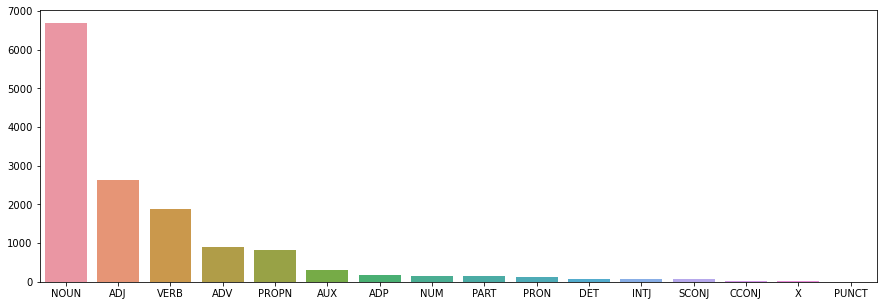

In [51]:
rev_pos,counts=count_texts(tot_text)
sns.barplot(x=rev_pos,y=counts)

In [52]:
rev_nouns = [token.text for token in doc if token.pos_ in ('NOUN')]
print(rev_nouns[0:5])

['noise', 'washing', 'spinning', 'return', 'customer']


<AxesSubplot:>

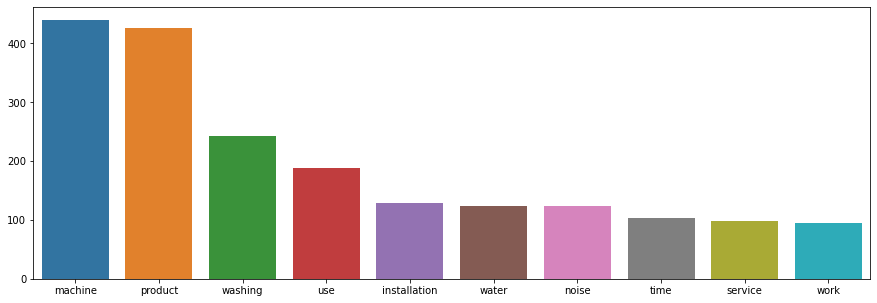

In [53]:
rev_nouns,counts=count_texts(rev_nouns)
sns.barplot(x=rev_nouns[0:10],y=counts[0:10])

# Ngram :

In [54]:
####         !pip install -U textblob

In [55]:
######       !python -m textblob.download_corpora

In [56]:
from textblob import TextBlob

In [57]:
# Function to generate n-grams from sentences.
def extract_ngrams(data, num):
    n_grams = TextBlob(data).ngrams(num)
    return [ ' '.join(grams) for grams in n_grams]
 

 
    #print("1-gram: ", extract_ngrams(str(tot_reviwes), 1))
print("2-gram: ", extract_ngrams(str(tot_reviwes), 2))
#print("3-gram: ", extract_ngrams(tot_reviwes, 3))
#print("4-gram: ", extract_ngrams(tot_reviwes, 4))

2-gram:  ["'horrible 'noise", "'noise 'come", "'come 'washing", "'washing 'spinning", "'spinning 'return", "'return 'backhowever", "'backhowever 'samsung", "'samsung 'customer", "'customer 'care", "'care 'convince", "'convince 'complaint", "'complaint 'horrible", "'horrible 'noise", "'noise 'reject", "'reject 'request", "'request 'return", "'return 'product", "'product 'thereafter", "'thereafter 'raise", "'raise 'issue", "'issue 'amazon", "'amazon 'understand", "'understand 'grievance", "'grievance 'send", "'send 'technician", "'technician 'technician", "'technician 'check", "'check 'machine", "'machine 'thoroughly", "'thoroughly 'come", "'come 'conclusion", "'conclusion 'manufacturing", "'manufacturing 'defect", "'defect 'due", "'due 'annoying", "'annoying 'noise", "'noise 'come", "'come 'next", "'next 'day", "'day 'amazon", "'amazon 'arrange", "'arrange 'pickup", "'pickup 'product", "'product 'hour", "'hour 'pickup", "'pickup 'money", "'money 'transfer", "'transfer 'bank", "'bank 'ac

# Sentiment Analysis :

In [58]:
# Sentiment Analysis : Polarity and Subjectivity
polarity=[]
subjectivity=[]
for i in range(0,len(df_reviews_ratings.Reviews)):
    reviews = TextBlob(df_reviews_ratings.Reviews[i])
    polarity.append(reviews.sentiment.polarity)
    subjectivity.append(reviews.sentiment.subjectivity)
df_reviews_ratings["Polarity"]=polarity
df_reviews_ratings["Subjectivity"]=subjectivity

In [59]:
df_reviews_ratings

,Reviews,Ratings,Orig_Reviews,no_of_characters,no_of_words,avd_Word_Length,Polarity,Subjectivity
0,horrible noise come washing spinning return ba...,1,Horrible noise coming while washing or spinnin...,712,116,5.129310,-0.069444,0.691667
1,make life easierwrite review month use wash ev...,5,It's made my life easier.Writing this review a...,1366,245,4.563265,0.096825,0.531746
2,would like share experience one onedelivery ex...,5,I would like to share my experience one by one...,2673,453,4.852097,0.229518,0.560618
3,medium could load washing machine got deliver ...,5,The media could not be loaded.\n ...,842,149,4.550336,0.300000,0.556667
4,medium could load defective product recievedth...,2,The media could not be loaded.\n ...,1369,227,4.933921,-0.154167,0.381859
...,...,...,...,...,...,...,...,...
985,machine work perfectly wash fine,5,Machine works perfectly and washes fine.,39,6,5.666667,0.708333,0.750000
986,good productclothe get fast dry,5,Good product..Clothes get fast dry,32,5,5.600000,0.277778,0.600000
987,good washing esay handle little sound heavy using,4,Good in washing esay to handle but little soun...,68,13,4.307692,0.178125,0.500000
988,far good,5,So far so good,14,4,2.750000,0.400000,0.800000


In [60]:
# Exporting the file for further process : 

df_reviews_ratings.to_csv('PreProcessed_data.csv', index=False)

In [61]:
df_reviews_ratings.to_excel('PreProcessed_data.xlsx', index=False)

In [62]:
df_reviews_ratings.Polarity.min()

-1.0

### Sentiment Calculation : 

In [63]:
def polarity(x):
    if TextBlob(x).sentiment[0]<-0.25:
        return 'Negative'
    if TextBlob(x).sentiment[0]>0.25:
        return 'Positive'
    return 'Neutral'
df_reviews_ratings['sentiment']= df_reviews_ratings['Reviews'].map(lambda x: polarity(x))

C:\Users\Mani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


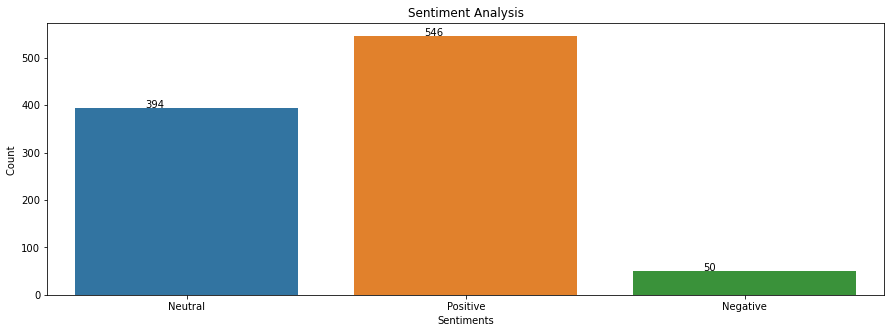

In [64]:
ax=sns.countplot(df_reviews_ratings.sentiment)
ax.set(xlabel='Sentiments', ylabel='Count ', title='Sentiment Analysis')
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.75))
plt.show()

### Reviews with Least Polarity :

In [65]:
df_leastpolarity=df_reviews_ratings.loc[(df_reviews_ratings.Polarity == df_reviews_ratings.Polarity.min() )].head(10)

In [66]:
df_leastpolarity[["Orig_Reviews"]]

,Orig_Reviews
98,Pathetic installation service. The water was l...
182,Horrible experience when I need the item urgen...
699,Please do not buy this machine. It’s making ho...


### Reviews with Least Subjectivity : 

In [67]:
df_leastSubjectivity=df_reviews_ratings.loc[(df_reviews_ratings.Subjectivity == df_reviews_ratings.Subjectivity.min() )].head(10)

In [68]:
df_leastSubjectivity[["Orig_Reviews"]]

,Orig_Reviews
63,As soon as we start the washing machine it sta...
119,Using for 3 months now..perfect product. 5/5 i...
127,The media could not be loaded.\n ...
179,Two time received damage washing machine
188,"Silent,spacious,clean laundry comes out after ..."
197,Everytime machine is operated water logs under...
198,I purchased this product 1 month back only. It...
204,Never expected this from amazon to deliver a d...
205,I have got it in Rs.12074.00 during republic d...
216,The water is not going out of the machine. Can...
